In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import random
import numpy as np
from astropy.io import ascii
from astropy.table import Table
import csv

In [6]:
cadence=26
t_list_years=[200,220,220.5,221,221.5,222,222.5,223,223.5,224,224.5,225]
t_list_cadence=[int(i*cadence) for i in t_list_years]
run=50
cluster_size=1000
steps=7800
stars=1000

## start with total mass

In [4]:
burst2000_5bin=np.load('/home/lee/data/1000stars_only/burst1000_5.npy')
L2000_5bin=np.load('/home/lee/data/1000stars_only/L1000_5.npy')
C2000_5bin=np.load('/home/lee/data/1000stars_only/C1000_5.npy')

In [7]:
num0_5bin=0
num3_5bin=0
num6_5bin=0
num16_5bin=0
num40_5bin=0
num100_5bin=0
num0_list_5bin=[]
num3_list_5bin=[]
num6_list_5bin=[]
num16_list_5bin=[]
num40_list_5bin=[]
num100_list_5bin=[]
run=50

for i in range(run):
    for j in range(stars):
        for k in range(steps):
            if C2000_5bin[i,j,k]==0:
                num0_5bin+=1
            elif C2000_5bin[i,j,k]==3:
                num3_5bin+=1
            elif C2000_5bin[i,j,k]==6:
                num6_5bin+=1
            elif C2000_5bin[i,j,k]==16:
                num16_5bin+=1    
            elif C2000_5bin[i,j,k]==40:
                num40_5bin+=1
            elif C2000_5bin[i,j,k]==100:
                num100_5bin+=1
    num0_list_5bin.append(num0_5bin)
    num3_list_5bin.append(num3_5bin)
    num6_list_5bin.append(num6_5bin)
    num16_list_5bin.append(num16_5bin)
    num40_list_5bin.append(num40_5bin)
    num100_list_5bin.append(num100_5bin)
    num0_5bin=0
    num3_5bin=0
    num6_5bin=0
    num16_5bin=0
    num40_5bin=0
    num100_5bin=0

In [8]:
num100_final_5bin=[]
for i in range(run):
    num100_final_5bin.append(num100_list_5bin[i]*100)
    
num40_final_5bin=[]
for i in range(run):
    num40_final_5bin.append(num40_list_5bin[i]*40)
    
num16_final_5bin=[]
for i in range(run):
    num16_final_5bin.append(num16_list_5bin[i]*16)
    
num6_final_5bin=[]
for i in range(run):
    num6_final_5bin.append(num6_list_5bin[i]*6)
    
num3_final_5bin=[]
for i in range(run):
    num3_final_5bin.append(num3_list_5bin[i]*3)
    
num0_final_5bin=[]
for i in range(run):
    num0_final_5bin.append(num0_list_5bin[i]*1)

In [9]:
number0_5bin=np.sum(num0_final_5bin)
number3_5bin=np.sum(num3_final_5bin)
number6_5bin=np.sum(num6_final_5bin)
number40_5bin=np.sum(num40_final_5bin)
number16_5bin=np.sum(num16_final_5bin)
number100_5bin=np.sum(num100_final_5bin)
total_5bin=number100_5bin+number40_5bin+number16_5bin+number6_5bin+number3_5bin+number0_5bin

y0=number0_5bin/total_5bin
y1=number3_5bin/total_5bin
y2=number6_5bin/total_5bin
y3=number16_5bin/total_5bin
y4=number40_5bin/total_5bin
y5=number100_5bin/total_5bin

print(y0,y1,y2,y3,y4,y5)

0.49126731555843406 0.10093722064011888 0.10447367477575745 0.10499720074396197 0.10479347116856938 0.09353111711315826


In [10]:
num100_total_5bin=[]
num40_total_5bin=[]
num16_total_5bin=[]
num3_total_5bin=[]
num6_total_5bin=[]
num0_total_5bin=[]
for i in range(run):
    total5=num100_final_5bin[i]+num40_final_5bin[i]+num16_final_5bin[i]+num6_final_5bin[i]+num3_final_5bin[i]+num0_final_5bin[i]
    num100_total_5bin.append(100*num100_final_5bin[i]/total5)
    num40_total_5bin.append(100*num40_final_5bin[i]/total5)
    num16_total_5bin.append(100*num16_final_5bin[i]/total5)
    num3_total_5bin.append(100*num3_final_5bin[i]/total5)
    num6_total_5bin.append(100*num6_final_5bin[i]/total5)
    num0_total_5bin.append(100*num0_final_5bin[i]/total5)

In [11]:
mean0=np.mean(num0_total_5bin)
std0=np.std(num0_total_5bin)
mean3=np.mean(num3_total_5bin)
std3=np.std(num3_total_5bin)
mean6=np.mean(num6_total_5bin)
std6=np.std(num6_total_5bin)
mean16=np.mean(num16_total_5bin)
std16=np.std(num16_total_5bin)
mean40=np.mean(num40_total_5bin)
std40=np.std(num40_total_5bin)
mean100=np.mean(num100_total_5bin)
std100=np.std(num100_total_5bin)

/tmp/ipykernel_38871/887943531.py:69: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['0','3x','6x','16x','40x','100x'])


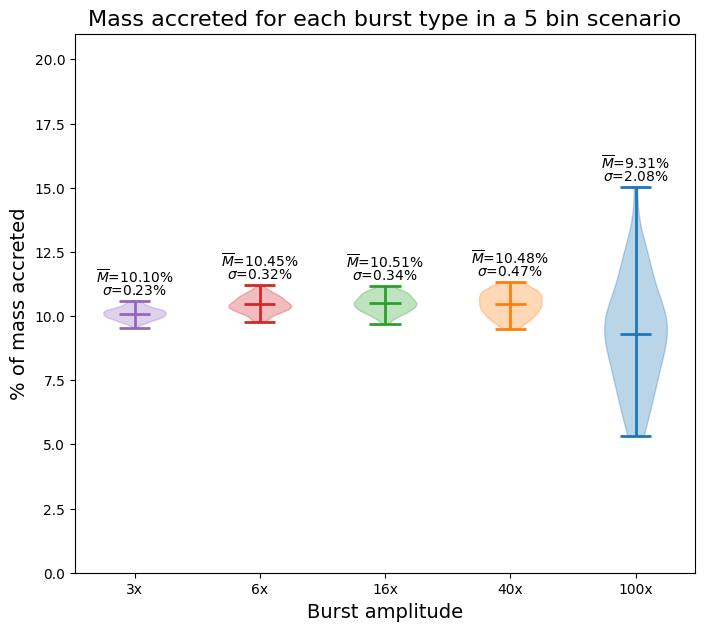

In [12]:
fig,ax1=plt.subplots()
fig.set_size_inches(8,7)
plt.rcParams['text.usetex']='False'
plt.rcParams['font.family']='sans serif'
plt.rcParams['axes.labelweight']='normal'
plt.rcParams['font.weight']='normal'

v100=ax1.violinplot(num100_total_5bin,positions=[5],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v100['bodies']:
    pc.set_facecolor('#1f77b4')
    pc.set_edgecolor('#1f77b4')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v100[partname]
    vp.set_edgecolor('#1f77b4')
    vp.set_linewidth(2)
    
    
v40=ax1.violinplot(num40_total_5bin,positions=[4],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v40['bodies']:
    pc.set_facecolor('#ff7f0e')
    pc.set_edgecolor('#ff7f0e')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v40[partname]
    vp.set_edgecolor('#ff7f0e')
    vp.set_linewidth(2)

v16=ax1.violinplot(num16_total_5bin,positions=[3],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v16['bodies']:
    pc.set_facecolor('#2ca02c')
    pc.set_edgecolor('#2ca02c')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v16[partname]
    vp.set_edgecolor('#2ca02c')
    vp.set_linewidth(2)
    
v6=ax1.violinplot(num6_total_5bin,positions=[2],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v6['bodies']:
    pc.set_facecolor('#d62728')
    pc.set_edgecolor('#d62728')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v6[partname]
    vp.set_edgecolor('#d62728')
    vp.set_linewidth(2)

v3=ax1.violinplot(num3_total_5bin,positions=[1],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v3['bodies']:
    pc.set_facecolor('#9467bd')
    pc.set_edgecolor('#9467bd')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v3[partname]
    vp.set_edgecolor('#9467bd')
    vp.set_linewidth(2)
    
#v0=ax1.violinplot(num0_total_5bin,positions=[1],vert=True, widths=0.5, showmeans=True, showextrema=True)
#for pc in v0['bodies']:
#    pc.set_facecolor('#8c564b')
#    pc.set_edgecolor('#8c564b')
#    pc.set_alpha(0.3)
#for partname in ('cbars','cmins','cmaxes','cmeans',):
#    vp=v0[partname]
#    vp.set_edgecolor('#8c564b')
#    vp.set_linewidth(2) 
    
ax1.set_xticklabels(['0','3x','6x','16x','40x','100x'])
ax1.set_ylabel('% of mass accreted',fontsize=14)
ax1.set_xlabel('Burst amplitude',fontsize=14)
    
string0mean='{:.2f}%'.format(np.mean(num0_total_5bin))
string0std='{:.2f}%'.format(np.std(num0_total_5bin))
string3mean='{:.2f}%'.format(np.mean(num3_total_5bin))
string3std='{:.2f}%'.format(np.std(num3_total_5bin))
string6mean='{:.2f}%'.format(np.mean(num6_total_5bin))
string6std='{:.2f}%'.format(np.std(num6_total_5bin))
string16mean='{:.2f}%'.format(np.mean(num16_total_5bin))
string16std='{:.2f}%'.format(np.std(num16_total_5bin))
string40mean='{:.2f}%'.format(np.mean(num40_total_5bin))
string40std='{:.2f}%'.format(np.std(num40_total_5bin))
string100mean='{:.2f}%'.format(np.mean(num100_total_5bin))
string100std='{:.2f}%'.format(np.std(num100_total_5bin))

ax1.set_ylim(0,21)
#ax1.text(1,np.min(num0_total_5bin)-2,'$\overline{M}$='+string0mean,ha='center')
#ax1.text(1,np.min(num0_total_5bin)-3.75,'$\sigma$='+string0std,ha='center')
ax1.text(1,np.max(num3_total_5bin)+0.7,'$\overline{M}$='+string3mean,ha='center')
ax1.text(1,np.max(num3_total_5bin)+0.25,'$\sigma$='+string3std,ha='center')
ax1.text(2,np.max(num6_total_5bin)+0.7,'$\overline{M}$='+string6mean,ha='center')
ax1.text(2,np.max(num6_total_5bin)+0.25,'$\sigma$='+string6std,ha='center')
ax1.text(3,np.max(num16_total_5bin)+0.7,'$\overline{M}$='+string16mean,ha='center')
ax1.text(3,np.max(num16_total_5bin)+0.25,'$\sigma$='+string16std,ha='center')
ax1.text(4,np.max(num40_total_5bin)+0.7,'$\overline{M}$='+string40mean,ha='center')
ax1.text(4,np.max(num40_total_5bin)+0.25,'$\sigma$='+string40std,ha='center')
ax1.text(5,np.max(num100_total_5bin)+0.7,'$\overline{M}$='+string100mean,ha='center')
ax1.text(5,np.max(num100_total_5bin)+0.25,'$\sigma$='+string100std,ha='center')
plt.title('Mass accreted for each burst type in a 5 bin scenario',fontsize=16)
plt.show()    

## observed mass

In [14]:
L2000=np.load('/home/lee/data/cluster_size_change/100x_burst/L1000.npy')

#100
cluster_size2000=1000
cad_L2000=np.zeros((run,cluster_size2000,12))
for i in range(run):
    for j in range(cluster_size2000):
        for k in range(len(t_list_cadence)):
            cad_L2000[i,j,k]=L2000[i,j,t_list_cadence[k]]

obs_burst2000=np.zeros((run,cluster_size2000,12))
for i in range(run):
    for k in range(cluster_size2000):
        for j in range(1,12):
            if cad_L2000[i,k,j]-cad_L2000[i,k,j-1]==5:
                    obs_burst2000[i,k,j-30:j]=1
            elif cad_L2000[i,k,j-1]-cad_L2000[i,k,j]==5:
                    obs_burst2000[i,k,j:j+30]=1


#40
obs_burst2000=np.zeros((run,cluster_size2000,12))
for i in range(run):
    for k in range(cluster_size2000):
        for j in range(1,12):
            if j==1:
                if cad_L2000[i,k,j]-cad_L2000[i,k,j-1]==4:
                    obs_burst2000[i,k,j-1]=1
                elif cad_L2000[i,k,j-1]-cad_L2000[i,k,j]==4:
                    if cad_L2000[i,k,j]!=cad_L2000[i,k,j+1]:
                        obs_burst2000[i,k,j]=1
                    elif cad_L2000[i,k,j]==cad_L2000[i,k,j+1]:
                        obs_burst2000[i,k,j:j+2]=1
            else:
                if cad_L2000[i,k,j]-cad_L2000[i,k,j-1]==4:
                    obs_burst2000[i,k,j-6:j]=1 
                    obs_burst2000[i,k,0]=0
                elif cad_L2000[i,k,j-1]-cad_L2000[i,k,j]==4:
                    obs_burst2000[i,k,j:j+6]=1
                    print(i,k)

#16
obs_burst2000=np.zeros((run,cluster_size2000,12))
for i in range(run):
    for k in range(cluster_size2000):
        for j in range(1,12):
            if j==1:
                if cad_L2000[i,k,j]-cad_L2000[i,k,j-1]==3:
                    obs_burst2000[i,k,j-1]=1
                elif cad_L2000[i,k,j-1]-cad_L2000[i,k,j]==3:
                    if cad_L2000[i,k,j]!=cad_L2000[i,k,j+1]:
                        obs_burst2000[i,k,j]=1
                    elif cad_L2000[i,k,j]==cad_L2000[i,k,j+1]:
                        obs_burst2000[i,k,j:j+2]=1
                        print(i,k)
            else:
                if cad_L2000[i,k,j-1]-cad_L2000[i,k,j]==3:
                    obs_burst2000[i,k,j:j+2]=1
                if cad_L2000[i,k,j]-cad_L2000[i,k,j-1]==3:
                    obs_burst2000[i,k,j-2:j]=1

#6
obs_burst2000=np.zeros((run,cluster_size2000,12))
for i in range(run):
    for k in range(cluster_size2000):
        for j in range(1,12):
            if j==1:
                if cad_L2000[i,k,j]-cad_L2000[i,k,j-1]==2:
                    obs_burst2000[i,k,j-1]=1
                elif cad_L2000[i,k,j-1]-cad_L2000[i,k,j]==2:
                    if cad_L2000[i,k,j]!=cad_L2000[i,k,j+1]:
                        obs_burst2000[i,k,j]=1
                    elif cad_L2000[i,k,j]==cad_L2000[i,k,j+1]:
                        obs_burst2000[i,k,j:j+2]=1
            else:
                if cad_L2000[i,k,j]-cad_L2000[i,k,j-1]==2:
                    obs_burst2000[i,k,j-6:j]=1 
                    obs_burst2000[i,k,0]=0
                elif cad_L2000[i,k,j-1]-cad_L2000[i,k,j]==2:
                    obs_burst2000[i,k,j:j+6]=1

#3
obs_burst2000=np.zeros((run,cluster_size2000,32))
for i in range(run):
    for k in range(cluster_size2000):
        for j in range(1,12):
            if cad_L2000[i,k,j]-cad_L2000[i,k,j-1]==1.25:
                obs_burst2000[i,k,j-1]=1
            if cad_L2000[i,k,j-1]-cad_L2000[i,k,j]==1.25:
               obs_burst2000[i,k,j]=1


num100_2000=0
list100_2000=[]
num0_2000=0
list0_2000=[]

for i in range(run):
    for k in range(cluster_size2000):
        for j in range(0,12):
            if obs_burst2000[i,k,j]==1:
                num100_2000+=1
            elif obs_burst2000[i,k,j]==0:
                num0_2000+=1
    list100_2000.append(num100_2000)
    num100_2000=0
    list0_2000.append(num0_2000)
    num0_2000=0

mass100_2000=[]
mass0_2000=[]
for i in range(run):
    mass100_2000.append(list100_2000[i]*100)
    mass0_2000.append(list0_2000[i]*1)

frac100_2000=[]
frac0_2000=[]
for i in range(run):
    total2000=mass100_2000[i]+mass0_2000[i]
    frac100_2000.append(100*mass100_2000[i]/total2000)
    frac0_2000.append(100*mass0_2000[i]/total2000)

In [16]:
L2000=np.load('/home/lee/data/1000stars_only/L1000_5.npy')

#100
cluster_size2000=1000
cad_L2000=np.zeros((run,cluster_size2000,12))
for i in range(run):
    for j in range(cluster_size2000):
        for k in range(len(t_list_cadence)):
            cad_L2000[i,j,k]=L2000[i,j,t_list_cadence[k]]

obs_burst2000=np.zeros((run,cluster_size2000,12))
for i in range(run):
    for k in range(cluster_size2000):
        for j in range(1,12):
            if cad_L2000[i,k,j]-cad_L2000[i,k,j-1]==5:
                    obs_burst2000[i,k,j-30:j]=100
            elif cad_L2000[i,k,j-1]-cad_L2000[i,k,j]==5:
                    obs_burst2000[i,k,j:j+30]=100


#40
for i in range(run):
    for k in range(cluster_size2000):
        for j in range(1,12):
            if j==1:
                if cad_L2000[i,k,j]-cad_L2000[i,k,j-1]==4:
                    obs_burst2000[i,k,j-1]=40
                elif cad_L2000[i,k,j-1]-cad_L2000[i,k,j]==4:
                    if cad_L2000[i,k,j]!=cad_L2000[i,k,j+1]:
                        obs_burst2000[i,k,j]=40
                    elif cad_L2000[i,k,j]==cad_L2000[i,k,j+1]:
                        obs_burst2000[i,k,j:j+2]=1
            else:
                if cad_L2000[i,k,j]-cad_L2000[i,k,j-1]==4:
                    obs_burst2000[i,k,j-6:j]=40
                    obs_burst2000[i,k,0]=0
                elif cad_L2000[i,k,j-1]-cad_L2000[i,k,j]==4:
                    obs_burst2000[i,k,j:j+6]=40

#16 
for i in range(run):
    for k in range(cluster_size2000):
        for j in range(1,12):
            if j==1:
                if cad_L2000[i,k,j]-cad_L2000[i,k,j-1]==3:
                    obs_burst2000[i,k,j-1]=16
                elif cad_L2000[i,k,j-1]-cad_L2000[i,k,j]==3:
                    if cad_L2000[i,k,j]!=cad_L2000[i,k,j+1]:
                        obs_burst2000[i,k,j]=16
                    elif cad_L2000[i,k,j]==cad_L2000[i,k,j+1]:
                        obs_burst2000[i,k,j:j+2]=16
            else:
                if cad_L2000[i,k,j-1]-cad_L2000[i,k,j]==3:
                    obs_burst2000[i,k,j:j+2]=16
                if cad_L2000[i,k,j]-cad_L2000[i,k,j-1]==3:
                    obs_burst2000[i,k,j-2:j]=16

#3
for i in range(run):
    for k in range(cluster_size2000):
        for j in range(1,12):
            if cad_L2000[i,k,j]-cad_L2000[i,k,j-1]==1.25:
                obs_burst2000[i,k,j-1]=3
            elif cad_L2000[i,k,j-1]-cad_L2000[i,k,j]==1.25:
               obs_burst2000[i,k,j]=3

for i in range(run):
    for k in range(cluster_size2000):
        for j in range(1,12):
            if j==1:
                if cad_L2000[i,k,j]-cad_L2000[i,k,j-1]==2:
                    obs_burst2000[i,k,j-1]=6
                elif cad_L2000[i,k,j-1]-cad_L2000[i,k,j]==2:
                    if cad_L2000[i,k,j]!=cad_L2000[i,k,j+1]:
                        obs_burst2000[i,k,j]=6
                    elif cad_L2000[i,k,j]==cad_L2000[i,k,j+1]:
                        obs_burst2000[i,k,j:j+2]=6
            else:
                if cad_L2000[i,k,j]-cad_L2000[i,k,j-1]==2:
                    obs_burst2000[i,k,j-6:j]=6
                    obs_burst2000[i,k,0]=0
                elif cad_L2000[i,k,j-1]-cad_L2000[i,k,j]==2:
                    obs_burst2000[i,k,j:j+6]=6
                    print(i,k)

0 26
0 41
0 52
0 84
0 130
0 139
0 145
0 198
0 214
0 231
0 239
0 243
0 268
0 287
0 289
0 337
0 346
0 392
0 394
0 400
0 421
0 424
0 429
0 481
0 525
0 555
0 593
0 606
0 612
0 639
0 673
0 678
0 716
0 722
0 787
0 806
0 827
0 859
0 860
0 892
0 909
0 915
0 948
0 954
0 963
0 975
0 978
1 29
1 55
1 194
1 247
1 279
1 295
1 303
1 316
1 356
1 380
1 387
1 399
1 404
1 482
1 519
1 567
1 583
1 606
1 618
1 714
1 743
1 782
1 804
1 815
1 821
1 831
1 861
1 893
1 896
1 940
1 987
1 997
2 15
2 73
2 116
2 138
2 154
2 275
2 282
2 283
2 301
2 307
2 349
2 417
2 420
2 423
2 523
2 573
2 578
2 588
2 645
2 661
2 668
2 672
2 678
2 736
2 752
2 781
2 798
2 819
2 840
3 2
3 3
3 24
3 25
3 57
3 63
3 85
3 166
3 269
3 280
3 347
3 399
3 415
3 441
3 457
3 536
3 538
3 550
3 559
3 607
3 641
3 662
3 668
3 720
3 728
3 743
3 766
3 779
3 786
3 827
3 868
3 889
3 910
3 943
3 944
3 975
4 16
4 45
4 52
4 55
4 64
4 97
4 118
4 120
4 122
4 133
4 154
4 156
4 158
4 159
4 167
4 178
4 179
4 188
4 217
4 226
4 266
4 312
4 340
4 363
4 376
4 400
4 4

In [17]:
print(obs_burst2000[0,28,:])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [18]:
num3_2000=0
list3_2000=[]
num6_2000=0
list6_2000=[]
num16_2000=0
list16_2000=[]
num40_2000=0
list40_2000=[]
num100_2000=0
list100_2000=[]
num0_2000=0
list0_2000=[]

for i in range(run):
    for k in range(cluster_size2000):
        for j in range(0,12):
            if obs_burst2000[i,k,j]==3:
                num3_2000+=1
            elif obs_burst2000[i,k,j]==6:
                num6_2000+=1 
            elif obs_burst2000[i,k,j]==16:
                num16_2000+=1 
            elif obs_burst2000[i,k,j]==40:
                num40_2000+=1 
            elif obs_burst2000[i,k,j]==100:
                num100_2000+=1 
            elif obs_burst2000[i,k,j]==0:
                num0_2000+=1
    list3_2000.append(num3_2000)
    num3_2000=0
    list6_2000.append(num6_2000)
    num6_2000=0
    list16_2000.append(num16_2000)
    num16_2000=0
    list40_2000.append(num40_2000)
    num40_2000=0
    list100_2000.append(num100_2000)
    num100_2000=0
    list0_2000.append(num0_2000)
    num0_2000=0

In [19]:
mass3_2000=[]
mass6_2000=[]
mass16_2000=[]
mass40_2000=[]
mass100_2000=[]
mass0_2000=[]
for i in range(run):
    mass3_2000.append(list3_2000[i]*3)
    mass6_2000.append(list6_2000[i]*6)
    mass16_2000.append(list16_2000[i]*16)
    mass40_2000.append(list40_2000[i]*40)
    mass100_2000.append(list100_2000[i]*100)
    mass0_2000.append(list0_2000[i]*1)

In [20]:
frac3_2000=[]
frac6_2000=[]
frac16_2000=[]
frac40_2000=[]
frac100_2000=[]
frac0_2000=[]
for i in range(run):
    total2000=mass3_2000[i]+mass6_2000[i]+mass16_2000[i]+mass40_2000[i]+mass100_2000[i]+mass0_2000[i]
    frac3_2000.append(100*mass3_2000[i]/total2000)
    frac6_2000.append(100*mass6_2000[i]/total2000)
    frac16_2000.append(100*mass16_2000[i]/total2000)
    frac40_2000.append(100*mass40_2000[i]/total2000)
    frac100_2000.append(100*mass100_2000[i]/total2000)
    frac0_2000.append(100*mass0_2000[i]/total2000)

In [21]:
#means and std
mean3=np.mean(frac3_2000)
std3=np.std(frac3_2000)
mean6=np.mean(frac6_2000)
std6=np.std(frac6_2000)
mean16=np.mean(frac16_2000)
std16=np.std(frac16_2000)
mean40=np.mean(frac40_2000)
std40=np.std(frac40_2000)
mean100=np.mean(frac100_2000)
std100=np.std(frac100_2000)

/tmp/ipykernel_38871/10209458.py:58: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['0','3','6','16','40','100'])


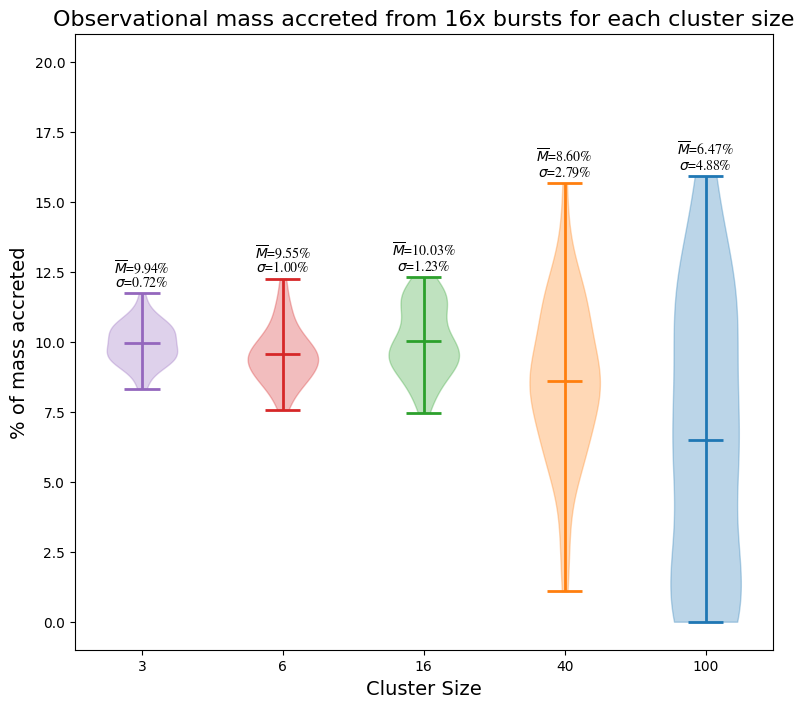

In [22]:
fig,ax1=plt.subplots()
fig.set_size_inches(9,8)
plt.rcParams['text.usetex']='False'
plt.rcParams['font.family']='FreeSerif'
plt.rcParams['axes.labelweight']='normal'
plt.rcParams['font.weight']='normal'

v100=ax1.violinplot(frac3_2000,positions=[1],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v100['bodies']:
    pc.set_facecolor('#9467bd')
    pc.set_edgecolor('#9467bd')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v100[partname]
    vp.set_edgecolor('#9467bd')
    vp.set_linewidth(2)
    
v0=ax1.violinplot(frac6_2000,positions=[2],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v0['bodies']:
    pc.set_facecolor('#d62728')
    pc.set_edgecolor('#d62728')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v0[partname]
    vp.set_edgecolor('#d62728')
    vp.set_linewidth(2) 

v0=ax1.violinplot(frac16_2000,positions=[3],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v0['bodies']:
    pc.set_facecolor('#2ca02c')
    pc.set_edgecolor('#2ca02c')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v0[partname]
    vp.set_edgecolor('#2ca02c')
    vp.set_linewidth(2) 
    
v0=ax1.violinplot(frac40_2000,positions=[4],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v0['bodies']:
    pc.set_facecolor('#ff7f0e')
    pc.set_edgecolor('#ff7f0e')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v0[partname]
    vp.set_edgecolor('#ff7f0e')
    vp.set_linewidth(2) 
    
v0=ax1.violinplot(frac100_2000,positions=[5],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v0['bodies']:
    pc.set_facecolor('#1f77b4')
    pc.set_edgecolor('#1f77b4')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v0[partname]
    vp.set_edgecolor('#1f77b4')
    vp.set_linewidth(2) 
    
ax1.set_xticklabels(['0','3','6','16','40','100'])
ax1.set_ylabel('% of mass accreted',fontsize=14)
ax1.set_xlabel('Cluster Size',fontsize=14)
    
string3mean='{:.2f}%'.format(mean3)
string3std='{:.2f}%'.format(std3)
string6mean='{:.2f}%'.format(mean6)
string6std='{:.2f}%'.format(std6)
string16mean='{:.2f}%'.format(mean16)
string16std='{:.2f}%'.format(std16)
string40mean='{:.2f}%'.format(mean40)
string40std='{:.2f}%'.format(std40)
string100mean='{:.2f}%'.format(mean100)
string100std='{:.2f}%'.format(std100)

#ax1.locator_params(axis='x',nbins=2)
ax1.set_ylim(-1,21)
ax1.text(1,np.max(frac3_2000)+0.75,'$\overline{M}$='+string3mean,ha='center')
ax1.text(1,np.max(frac3_2000)+0.25,'$\sigma$='+string3std,ha='center')
ax1.text(2,np.max(frac6_2000)+0.75,'$\overline{M}$='+string6mean,ha='center')
ax1.text(2,np.max(frac6_2000)+0.25,'$\sigma$='+string6std,ha='center')
ax1.text(3,np.max(frac16_2000)+0.75,'$\overline{M}$='+string16mean,ha='center')
ax1.text(3,np.max(frac16_2000)+0.25,'$\sigma$='+string16std,ha='center')
ax1.text(4,np.max(frac40_2000)+0.75,'$\overline{M}$='+string40mean,ha='center')
ax1.text(4,np.max(frac40_2000)+0.25,'$\sigma$='+string40std,ha='center')
ax1.text(5,np.max(frac100_2000)+0.75,'$\overline{M}$='+string100mean,ha='center')
ax1.text(5,np.max(frac100_2000)+0.25,'$\sigma$='+string100std,ha='center')



plt.title('Observational mass accreted from 16x bursts for each cluster size',fontsize=16)
#plt.savefig('/home/lee/research/figs/observational/observational_mass_size_change_violinplot16x.jpeg',dpi=300,bbox_inches='tight')
plt.show()  

## combine them

/tmp/ipykernel_38871/792713532.py:59: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['S.S.','3x','6x','16x','40x','100x'])
/tmp/ipykernel_38871/792713532.py:136: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['S.S.','3x','6x','16x','40x','100x'])
/tmp/ipykernel_38871/792713532.py:174: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['S.S.','3x','6x','16x','40x','100x'])
/tmp/ipykernel_38871/792713532.py:175: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['S.S.','3x','6x','16x','40x','100x'])


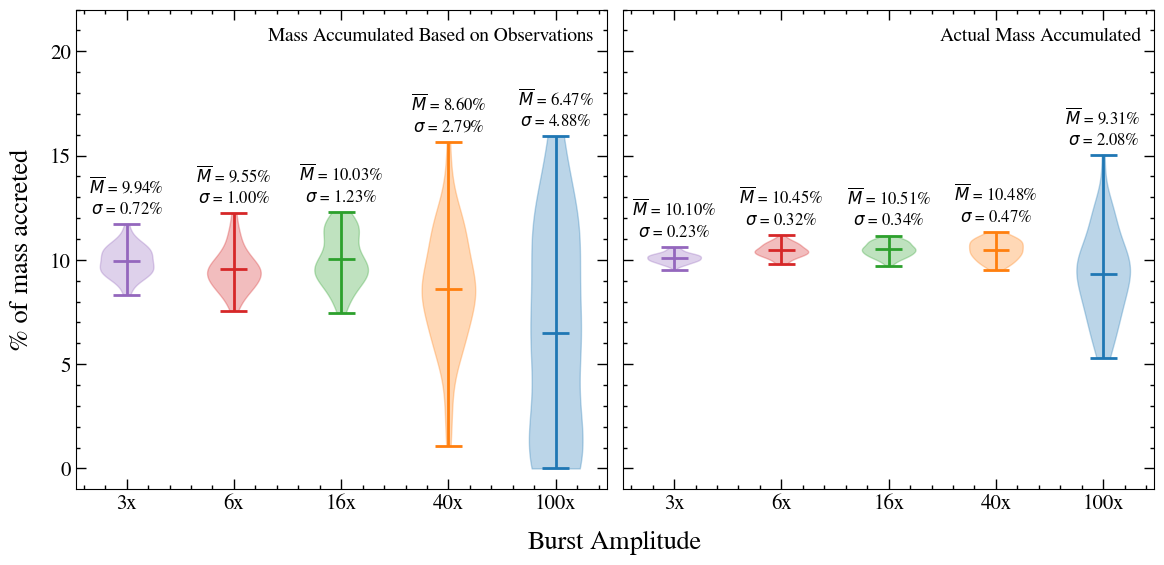

In [23]:
fig,((ax2,ax1))=plt.subplots(1,2,sharey='row',sharex='row')
fig.set_size_inches(12,6)
plt.rcParams['text.usetex']='False'
plt.rcParams['font.family']='FreeSerif'
plt.rcParams['axes.labelweight']='normal'
plt.rcParams['font.weight']='normal'

v100=ax1.violinplot(num100_total_5bin,positions=[5],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v100['bodies']:
    pc.set_facecolor('#1f77b4')
    pc.set_edgecolor('#1f77b4')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v100[partname]
    vp.set_edgecolor('#1f77b4')
    vp.set_linewidth(2)
    
    
v40=ax1.violinplot(num40_total_5bin,positions=[4],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v40['bodies']:
    pc.set_facecolor('#ff7f0e')
    pc.set_edgecolor('#ff7f0e')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v40[partname]
    vp.set_edgecolor('#ff7f0e')
    vp.set_linewidth(2)

v16=ax1.violinplot(num16_total_5bin,positions=[3],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v16['bodies']:
    pc.set_facecolor('#2ca02c')
    pc.set_edgecolor('#2ca02c')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v16[partname]
    vp.set_edgecolor('#2ca02c')
    vp.set_linewidth(2)
    
v6=ax1.violinplot(num6_total_5bin,positions=[2],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v6['bodies']:
    pc.set_facecolor('#d62728')
    pc.set_edgecolor('#d62728')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v6[partname]
    vp.set_edgecolor('#d62728')
    vp.set_linewidth(2)

v3=ax1.violinplot(num3_total_5bin,positions=[1],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v3['bodies']:
    pc.set_facecolor('#9467bd')
    pc.set_edgecolor('#9467bd')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v3[partname]
    vp.set_edgecolor('#9467bd')
    vp.set_linewidth(2)
    
ax1.set_xticklabels(['S.S.','3x','6x','16x','40x','100x'])
    
string0mean='{:.2f}%'.format(np.mean(num0_total_5bin))
string0std='{:.2f}%'.format(np.std(num0_total_5bin))
string3mean='{:.2f}%'.format(np.mean(num3_total_5bin))
string3std='{:.2f}%'.format(np.std(num3_total_5bin))
string6mean='{:.2f}%'.format(np.mean(num6_total_5bin))
string6std='{:.2f}%'.format(np.std(num6_total_5bin))
string16mean='{:.2f}%'.format(np.mean(num16_total_5bin))
string16std='{:.2f}%'.format(np.std(num16_total_5bin))
string40mean='{:.2f}%'.format(np.mean(num40_total_5bin))
string40std='{:.2f}%'.format(np.std(num40_total_5bin))
string100mean='{:.2f}%'.format(np.mean(num100_total_5bin))
string100std='{:.2f}%'.format(np.std(num100_total_5bin))

ax1.set_ylim(-1,21)
ax1.text(1,np.max(num3_total_5bin)+1.5,'$\overline{M}$ = '+string3mean,ha='center',fontsize=12)
ax1.text(1,np.max(num3_total_5bin)+0.5,'$\sigma$ = '+string3std,ha='center',fontsize=12)
ax1.text(2,np.max(num6_total_5bin)+1.5,'$\overline{M}$ = '+string6mean,ha='center',fontsize=12)
ax1.text(2,np.max(num6_total_5bin)+0.5,'$\sigma$ = '+string6std,ha='center',fontsize=12)
ax1.text(3,np.max(num16_total_5bin)+1.5,'$\overline{M}$ = '+string16mean,ha='center',fontsize=12)
ax1.text(3,np.max(num16_total_5bin)+0.5,'$\sigma$ = '+string16std,ha='center',fontsize=12)
ax1.text(4,np.max(num40_total_5bin)+1.5,'$\overline{M}$ = '+string40mean,ha='center',fontsize=12)
ax1.text(4,np.max(num40_total_5bin)+0.5,'$\sigma$ = '+string40std,ha='center',fontsize=12)
ax1.text(5,np.max(num100_total_5bin)+1.5,'$\overline{M}$ = '+string100mean,ha='center',fontsize=12)
ax1.text(5,np.max(num100_total_5bin)+0.5,'$\sigma$ = '+string100std,ha='center',fontsize=12)

v100=ax2.violinplot(frac3_2000,positions=[1],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v100['bodies']:
    pc.set_facecolor('#9467bd')
    pc.set_edgecolor('#9467bd')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v100[partname]
    vp.set_edgecolor('#9467bd')
    vp.set_linewidth(2)
    
v0=ax2.violinplot(frac6_2000,positions=[2],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v0['bodies']:
    pc.set_facecolor('#d62728')
    pc.set_edgecolor('#d62728')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v0[partname]
    vp.set_edgecolor('#d62728')
    vp.set_linewidth(2) 

v0=ax2.violinplot(frac16_2000,positions=[3],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v0['bodies']:
    pc.set_facecolor('#2ca02c')
    pc.set_edgecolor('#2ca02c')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v0[partname]
    vp.set_edgecolor('#2ca02c')
    vp.set_linewidth(2) 
    
v0=ax2.violinplot(frac40_2000,positions=[4],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v0['bodies']:
    pc.set_facecolor('#ff7f0e')
    pc.set_edgecolor('#ff7f0e')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v0[partname]
    vp.set_edgecolor('#ff7f0e')
    vp.set_linewidth(2) 
    
v0=ax2.violinplot(frac100_2000,positions=[5],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v0['bodies']:
    pc.set_facecolor('#1f77b4')
    pc.set_edgecolor('#1f77b4')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v0[partname]
    vp.set_edgecolor('#1f77b4')
    vp.set_linewidth(2) 
    
ax2.set_xticklabels(['S.S.','3x','6x','16x','40x','100x'])
    
string3mean='{:.2f}%'.format(mean3)
string3std='{:.2f}%'.format(std3)
string6mean='{:.2f}%'.format(mean6)
string6std='{:.2f}%'.format(std6)
string16mean='{:.2f}%'.format(mean16)
string16std='{:.2f}%'.format(std16)
string40mean='{:.2f}%'.format(mean40)
string40std='{:.2f}%'.format(std40)
string100mean='{:.2f}%'.format(mean100)
string100std='{:.2f}%'.format(std100)

ax2.set_ylim(-1,22)
ax2.text(1,np.max(frac3_2000)+1.5,'$\overline{M}$ = '+string3mean,ha='center',fontsize=12)
ax2.text(1,np.max(frac3_2000)+0.5,'$\sigma$ = '+string3std,ha='center',fontsize=12)
ax2.text(2,np.max(frac6_2000)+1.5,'$\overline{M}$ = '+string6mean,ha='center',fontsize=12)
ax2.text(2,np.max(frac6_2000)+0.5,'$\sigma$ = '+string6std,ha='center',fontsize=12)
ax2.text(3,np.max(frac16_2000)+1.5,'$\overline{M}$ = '+string16mean,ha='center',fontsize=12)
ax2.text(3,np.max(frac16_2000)+0.5,'$\sigma$ = '+string16std,ha='center',fontsize=12)
ax2.text(4,np.max(frac40_2000)+1.5,'$\overline{M}$ = '+string40mean,ha='center',fontsize=12)
ax2.text(4,np.max(frac40_2000)+0.5,'$\sigma$ = '+string40std,ha='center',fontsize=12)
ax2.text(5,np.max(frac100_2000)+1.5,'$\overline{M}$ = '+string100mean,ha='center',fontsize=12)
ax2.text(5,np.max(frac100_2000)+0.5,'$\sigma$ = '+string100std,ha='center',fontsize=12)

ax1.locator_params(axis='y',nbins=6)
ax1.tick_params(axis='both',right=False,top=False,which='both')
ax1.tick_params(axis='both',which='major', length=7, width=1, direction='in',labelsize=15)
ax2.locator_params(axis='y',nbins=6)
ax2.tick_params(axis='both',right=False,top=False,which='both')
ax2.tick_params(axis='both',which='major', length=7, width=1, direction='in',labelsize=15)

ax3=fig.add_subplot(111,frameon=False)
#plt.tick_params(labelcolor='none',top='off',bottom='off',left='off',right='off',which='both',axis='both')
plt.minorticks_off()
plt.grid(False)
ax3.set_yticks([])
ax3.set_xticks([])
ax1.set_xticklabels(['S.S.','3x','6x','16x','40x','100x'])
ax2.set_xticklabels(['S.S.','3x','6x','16x','40x','100x'])
ax3.set_ylabel('% of mass accreted',fontsize=19,labelpad=30)
ax3.set_xlabel('Burst Amplitude',fontsize=19,labelpad=30)

ax1.minorticks_on()
ax1.tick_params(axis='both',right=True,top=True,which='both')
ax1.tick_params(axis='both',which='major', length=7, width=1, direction='in',labelsize=15)
ax1.tick_params(axis='both',which='minor', length=3, width=1, direction='in',labelsize=15)
ax2.minorticks_on()
ax2.yaxis.set_ticks_position('both')
ax2.tick_params(axis='both',right=True,top=True,which='both')
ax2.tick_params(axis='both',which='major', length=7, width=1, direction='in',labelsize=15)
ax2.tick_params(axis='both',which='minor', length=3, width=1, direction='in',labelsize=15)

fig.tight_layout()

ax1.text(5.35,20.5,'Actual Mass Accumulated',ha='right',fontsize=14)
ax2.text(5.35,20.5,'Mass Accumulated Based on Observations',ha='right',fontsize=14)

#plt.savefig('/home/lee/research/figs/observational/observational_mass_5bins_SidexSide.jpeg',dpi=300,bbox_inches='tight')
plt.show()    

/tmp/ipykernel_38871/3607745381.py:58: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['S.S.','3x','6x','16x','40x','100x'])


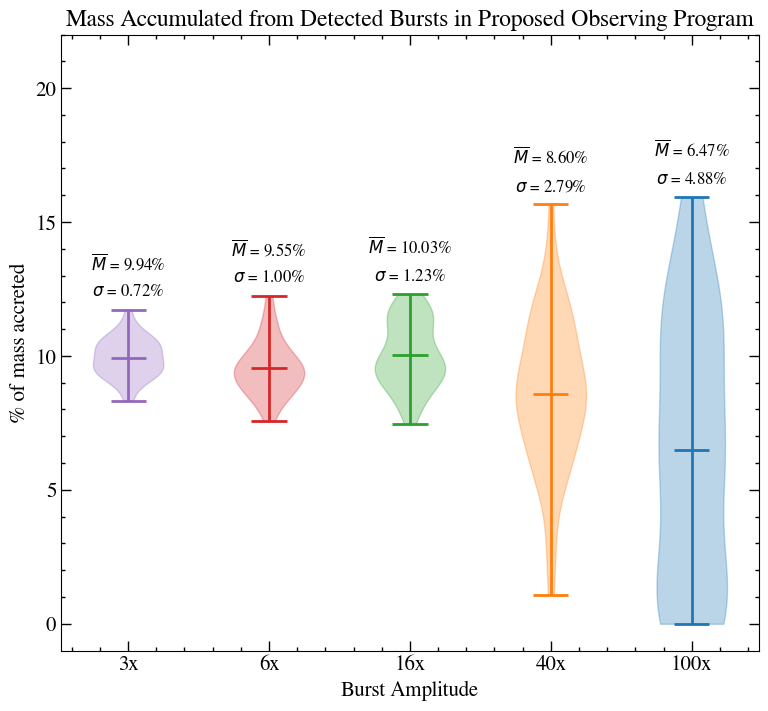

In [24]:
fig,ax2=plt.subplots()
fig.set_size_inches(9,8)
plt.rcParams['text.usetex']='False'
plt.rcParams['font.family']='FreeSerif'
plt.rcParams['axes.labelweight']='normal'
plt.rcParams['font.weight']='normal'

v100=ax2.violinplot(frac3_2000,positions=[1],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v100['bodies']:
    pc.set_facecolor('#9467bd')
    pc.set_edgecolor('#9467bd')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v100[partname]
    vp.set_edgecolor('#9467bd')
    vp.set_linewidth(2)
    
v0=ax2.violinplot(frac6_2000,positions=[2],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v0['bodies']:
    pc.set_facecolor('#d62728')
    pc.set_edgecolor('#d62728')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v0[partname]
    vp.set_edgecolor('#d62728')
    vp.set_linewidth(2) 

v0=ax2.violinplot(frac16_2000,positions=[3],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v0['bodies']:
    pc.set_facecolor('#2ca02c')
    pc.set_edgecolor('#2ca02c')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v0[partname]
    vp.set_edgecolor('#2ca02c')
    vp.set_linewidth(2) 
    
v0=ax2.violinplot(frac40_2000,positions=[4],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v0['bodies']:
    pc.set_facecolor('#ff7f0e')
    pc.set_edgecolor('#ff7f0e')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v0[partname]
    vp.set_edgecolor('#ff7f0e')
    vp.set_linewidth(2) 
    
v0=ax2.violinplot(frac100_2000,positions=[5],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v0['bodies']:
    pc.set_facecolor('#1f77b4')
    pc.set_edgecolor('#1f77b4')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v0[partname]
    vp.set_edgecolor('#1f77b4')
    vp.set_linewidth(2) 
    
ax2.set_xticklabels(['S.S.','3x','6x','16x','40x','100x'])
    
string3mean='{:.2f}%'.format(mean3)
string3std='{:.2f}%'.format(std3)
string6mean='{:.2f}%'.format(mean6)
string6std='{:.2f}%'.format(std6)
string16mean='{:.2f}%'.format(mean16)
string16std='{:.2f}%'.format(std16)
string40mean='{:.2f}%'.format(mean40)
string40std='{:.2f}%'.format(std40)
string100mean='{:.2f}%'.format(mean100)
string100std='{:.2f}%'.format(std100)

ax2.set_ylim(-1,22)
ax2.text(1,np.max(frac3_2000)+1.5,'$\overline{M}$ = '+string3mean,ha='center',fontsize=12)
ax2.text(1,np.max(frac3_2000)+0.5,'$\sigma$ = '+string3std,ha='center',fontsize=12)
ax2.text(2,np.max(frac6_2000)+1.5,'$\overline{M}$ = '+string6mean,ha='center',fontsize=12)
ax2.text(2,np.max(frac6_2000)+0.5,'$\sigma$ = '+string6std,ha='center',fontsize=12)
ax2.text(3,np.max(frac16_2000)+1.5,'$\overline{M}$ = '+string16mean,ha='center',fontsize=12)
ax2.text(3,np.max(frac16_2000)+0.5,'$\sigma$ = '+string16std,ha='center',fontsize=12)
ax2.text(4,np.max(frac40_2000)+1.5,'$\overline{M}$ = '+string40mean,ha='center',fontsize=12)
ax2.text(4,np.max(frac40_2000)+0.5,'$\sigma$ = '+string40std,ha='center',fontsize=12)
ax2.text(5,np.max(frac100_2000)+1.5,'$\overline{M}$ = '+string100mean,ha='center',fontsize=12)
ax2.text(5,np.max(frac100_2000)+0.5,'$\sigma$ = '+string100std,ha='center',fontsize=12)

ax1.locator_params(axis='y',nbins=6)
ax1.tick_params(axis='both',right=False,top=False,which='both')
ax1.tick_params(axis='both',which='major', length=7, width=1, direction='in',labelsize=15)
ax2.locator_params(axis='y',nbins=6)
ax2.tick_params(axis='both',right=False,top=False,which='both')
ax2.tick_params(axis='both',which='major', length=7, width=1, direction='in',labelsize=15)

ax2.locator_params(axis='y',nbins=6)
ax2.tick_params(axis='both',right=False,top=False,which='both')
ax2.tick_params(axis='both',which='major', length=7, width=1, direction='in',labelsize=15)

ax2.minorticks_on()
ax2.yaxis.set_ticks_position('both')
ax2.tick_params(axis='both',right=True,top=True,which='both')
ax2.tick_params(axis='both',which='major', length=7, width=1, direction='in',labelsize=15)
ax2.tick_params(axis='both',which='minor', length=3, width=1, direction='in',labelsize=15)

ax2.set_ylabel('% of mass accreted',fontsize=15)
ax2.set_xlabel('Burst Amplitude',fontsize=15)
ax2.set_title('Mass Accumulated from Detected Bursts in Proposed Observing Program',fontsize=17)

#plt.savefig('/home/lee/research/figs/observational/observational_mass_5bins.jpeg',dpi=300,bbox_inches='tight')
plt.show() 